# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [30]:
from commonfunctions import *
from commonfunctions import showHist as showHistCommon
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [32]:
'''
1
Negative Transformation
'''

picture1 = io.imread('./imgs/Picture1.png')
picture1 = rgb2gray(picture1[:,:,:3])
picture2 = io.imread('./imgs/Picture2.png')
picture2 = rgb2gray(picture2[:,:,:3])

In [33]:
def Negative(img,thres):
    myImg = np.copy(img)
    return (thres - myImg)

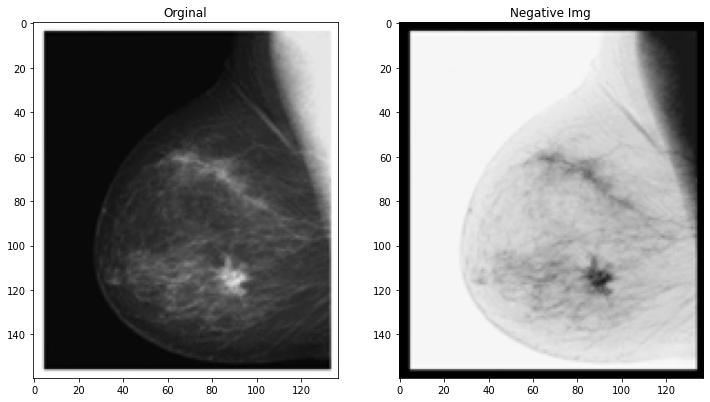

In [34]:
negImg =  Negative(picture1,255)
show_images([picture1,negImg],['Orginal','Negative Img'])

In [35]:
'''
2
Contrast Enhancement
'''
def contrastEnhancementEquation(x):
    return (3/2) * x + 50

def contrastEnhancement(img):
    newImg = np.copy(img)
    N,M= newImg.shape
    for i in range(N):
        for j in range(M):
            if  newImg[i,j] < 100:
                newImg[i,j] = contrastEnhancementEquation(newImg[i,j])
    return newImg


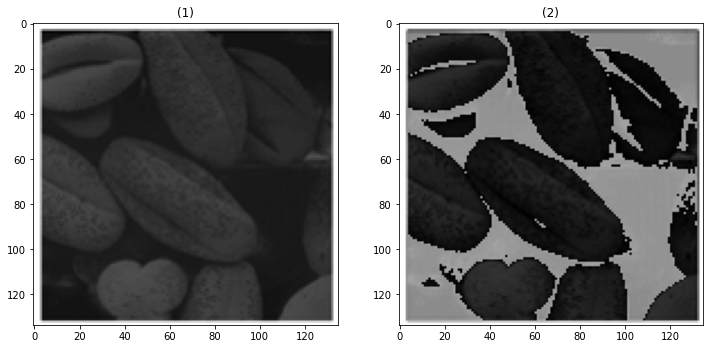

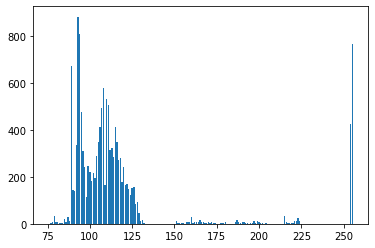

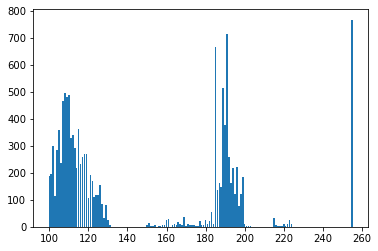

In [36]:

newPic2 = contrastEnhancement(picture2*256)
show_images([picture2,newPic2])
showHistCommon(picture2*256)
showHistCommon(newPic2)

In [37]:
'''
3
Gamma Correction
'''
def Gamma_Correction(img, c, gamma):
    newImg = np.copy(img)
    return c * (newImg ** gamma)



In [38]:
# Gamma = 3
# Output image is darker
newImg1 = Gamma_Correction(picture2, 1, 3)


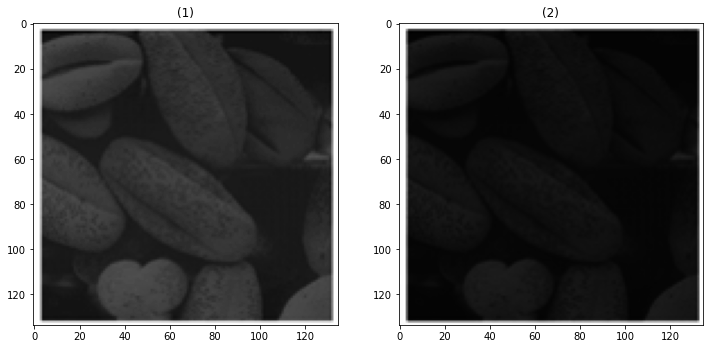

In [39]:
show_images([picture2,newImg1])

In [40]:
# Gamma = 0.5
# Output image is brighter
newImg2 = Gamma_Correction(picture2, 1, 0.5)

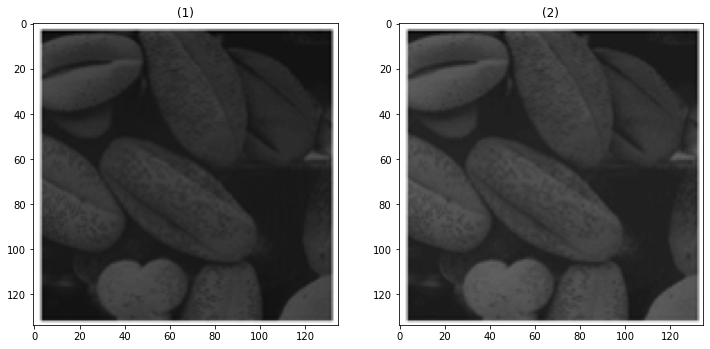

In [41]:
show_images([picture2,newImg2])

In [42]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def getImageWithHist(name,ext,nbins=256):
    pass
    



In [43]:
poutImg = io.imread('./imgs/pout.tif')
tireImg = io.imread('./imgs/tire.tif')

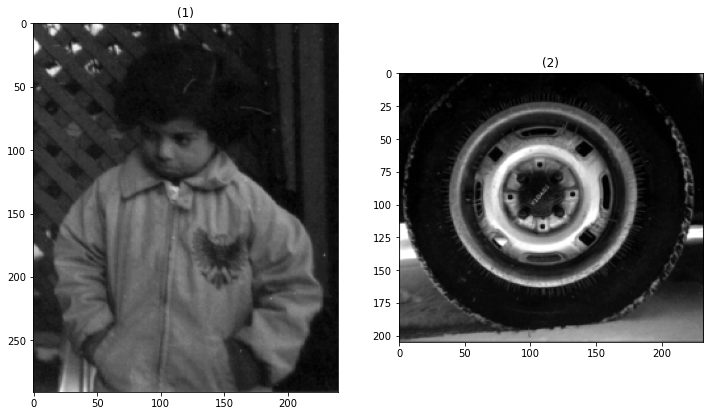

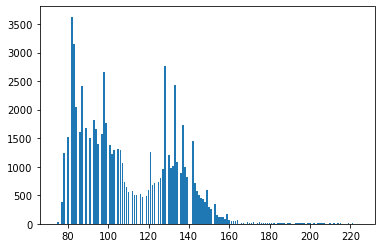

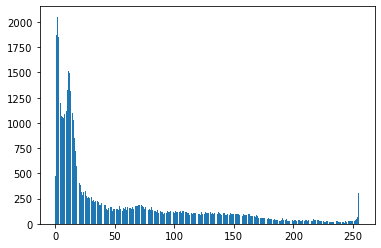

In [44]:
show_images([poutImg, tireImg])
showHistCommon(poutImg)
showHistCommon(tireImg)

In [45]:

def histogramEqualization(img, G=256):
    newImg = np.copy(img)
    newImg = newImg.astype(np.uint8)
    H = np.zeros((G))
    H_c = np.zeros((G))
    T = np.zeros((G))
    (N, M) = newImg.shape
    H = np.histogram(newImg, bins=G)


    H_c[0] = H[0][0]
    for p in range(1,H[0].shape[0]):
        H_c[p] = H_c[p-1] + H[0][p]
        T[p] = round((G - 1)*H_c[p]/(N*M))

    for i in range(N):
        for j in range(M):
            newImg[i,j] =  T[newImg[i,j]]            
    return newImg






In [ ]:
equalizationImg1 = histogramEqualization(poutImg,256)
equalizationImg2 = histogramEqualization(tireImg,256)
show_images([poutImg, equalizationImg1])
showHistCommon(poutImg)
showHistCommon(equalizationImg1)
show_images([tireImg, equalizationImg2])
showHistCommon(tireImg)
showHistCommon(equalizationImg2)

# Extra Task

In [71]:
img_blue1 = io.imread('./1.jpg')
img_blue2 = io.imread('./2.jpg')

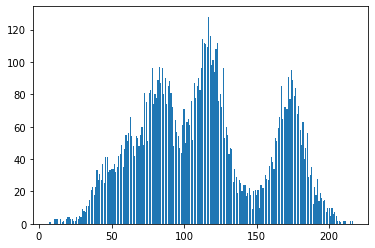

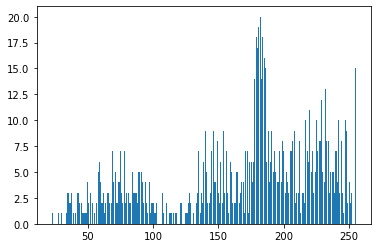

In [65]:
showHistCommon(img_blue1[2])
showHistCommon(img_blue2[2])


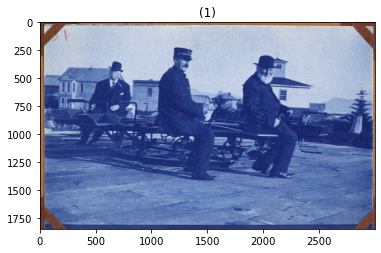

(256,)


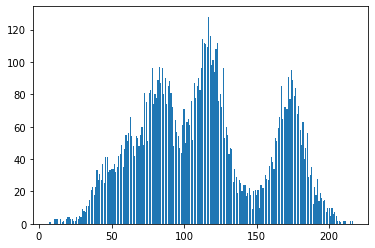

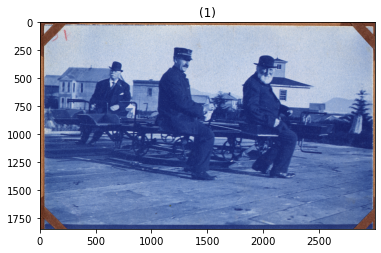

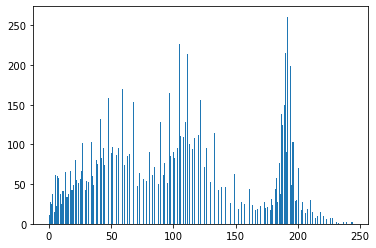

In [66]:
show_images([img_blue1])
showHistCommon(img_blue1[2])
img_blue1[2] = histogramEqualization(img_blue1[2])
# img_blue2[2] = histogramEqualization(img_blue2[2])
show_images([img_blue1])
showHistCommon(img_blue1[2])

In [72]:
def contrastEnhancementEquation_2(x):
    return (2/3) * (x - 50)

def contrastEnhancement_2(img):
    newImg = np.copy(img)
    N,M= newImg.shape
    for i in range(N):
        for j in range(M):
            if  newImg[i,j] > 100 and newImg[i,j] < 200:
                newImg[i,j] = contrastEnhancementEquation_2(newImg[i,j])
    return newImg

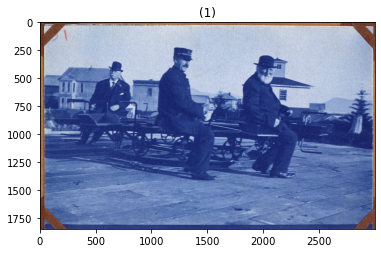

In [73]:
img_blue1[2] = contrastEnhancement_2(img_blue1[2])
show_images([img_blue1])